### Internship Test Part 2
### Machine Learning Hackathon


In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [65]:
import os
os.getcwd()


'C:\\Users\\dell'

### Step 1: Download the dataset from the link available above. 


In [3]:
a = pd.read_csv('C://Users//dell//Downloads//dataframe_.csv')
a

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


### Step 2: Perform proper analysis of the dataset and draw conclusions based on your analysis.

In [7]:
a.shape

(1697, 2)

In [4]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [5]:
a.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


In [8]:
a.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [9]:
a.tail()

,input,output
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052
1696,17.145296,-101.726894


In [12]:
a.isna()

,input,output
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1692,False,False
1693,False,False
1694,False,False
1695,False,False


### Check null values

In [10]:
a.isna().sum()

input     1
output    1
dtype: int64

In [13]:
a.value_counts(normalize=True)

input        output     
-125.366669   131.000000    0.005307
-63.366669   -33.000000     0.002358
 6.633331    -95.000000     0.002358
 3.633331    -95.000000     0.002358
-117.366669  -75.000000     0.002358
                              ...   
-97.786812   -46.269792     0.000590
-98.366669   -40.000000     0.000590
-99.614494   -39.332912     0.000590
 41.779811   -82.243125     0.000590
 134.605775   123.619680    0.000590
Length: 1090, dtype: float64

In [15]:
a.nunique()

input     991
output    969
dtype: int64

In [16]:
a.mean().to_frame().T

,input,output
0,1.159933,-34.088017


In [17]:
a.median().to_frame().T

,input,output
0,10.195194,-50.470981


In [18]:
a.std().to_frame().T

,input,output
0,79.00597,65.771112


In [19]:
a.skew().to_frame().T

,input,output
0,-0.203185,1.057323


In [20]:
a.var().to_frame().T

,input,output
0,6241.943326,4325.839203


In [21]:
num = a.select_dtypes(include = 'number').columns
num

Index(['input', 'output'], dtype='object')

### Detection of Outliers:

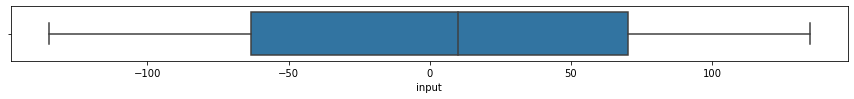

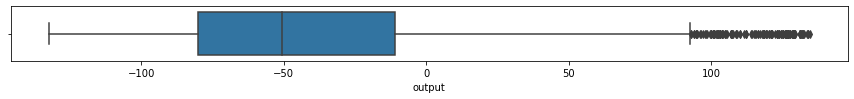

In [22]:
for i in num:
    plt.figure(figsize=(15,1))
    sns.boxplot(a[i])
    plt.show()

### Inter Quartile Range(IQR):
- Inter Quartile Range : iqr = q3-q1

- lb = q1 - 1.5*iqr

- ub = q3 - 1.5*iqr

#### Removal of Outliers using IQR

In [76]:
q1 = a['output'].quantile(0.25)
q3 = a['output'].quantile(0.75)

iqr = q3 - q1
lb = q1 - (1.5*iqr)

ub = q3 + (1.5*iqr)


Outliers = a[(a['output'] < lb) | (a['output'] > ub)].index
Outliers

Int64Index([313, 1191], dtype='int64')

In [77]:
a.drop(Outliers,inplace= True)

In [78]:
len(a['output'])

1407

### After removing outliers

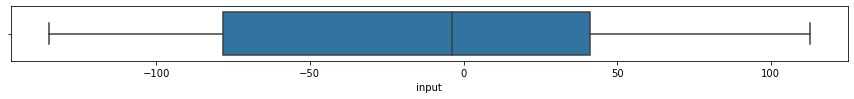

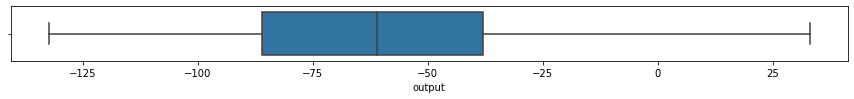

In [79]:
for i in num:
    plt.figure(figsize=(15,1))
    sns.boxplot(a[i])
    plt.show()

#### Outliers are present fill with mean:

In [80]:
a['output'] =a['output'].fillna(a['output'].mean())

#### Outliers are not present fill with median:

In [81]:
a['input'] =a['input'].fillna(a['input'].median())

In [82]:
a.isna().sum()

input     0
output    0
dtype: int64

### Store the data into a csv file:

In [83]:
a.to_csv('C://Users//dell//Downloads//dataframe_.csv')

In [84]:
a = pd.read_csv('C://Users//dell//Downloads//dataframe_.csv')
a.drop(['Unnamed: 0'],axis =1,inplace = True)
a.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [95]:
a.dtypes

input     float64
output    float64
dtype: object

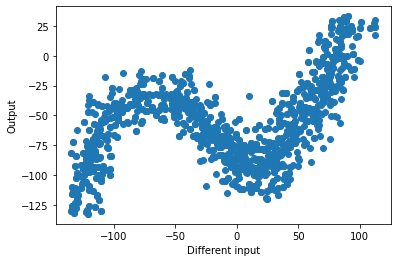

In [85]:
plt.scatter(a['input'],a['output'])
plt.xlabel('Different input')
plt.ylabel('Output')
plt.show()

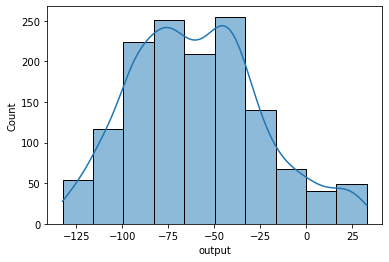

In [86]:
sns.histplot(a['output'],bins = 10, edgecolor = 'black',kde = True)
plt.show()

### Observation: This plot represent that 'Output' count increases from -100 to -25

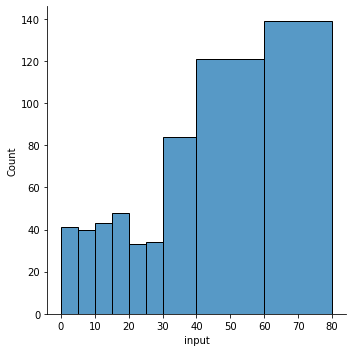

In [87]:
sns.displot(a['input'],bins=[0,5,10,15,20,25,30,40,60,80])

plt.show()

#### Observation: From above distplot in 'input ' column there is a increment from 40 - 80

### Step 3: Build a Machine Learning Model to predict output based on the input column.


In [88]:
y = a['output']
X = a[['input']]

In [89]:
X.head()

,input
0,-122.740667
1,-121.531419
2,-134.917019
3,-120.605951
4,-129.894781


In [90]:
y.head()

0   -130.572085
1   -129.938929
2   -130.141832
3   -125.760932
4   -112.785214
Name: output, dtype: float64

In [92]:
a.shape

(1407, 2)

In [93]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.75, random_state = 100)

print(X_train.shape,y_train.shape)

print(X_test.shape,y_test.shape)

(1055, 1) (1055,)
(352, 1) (352,)


In [94]:
X_train.dtypes

input    float64
dtype: object

### Data preparation on train data:
- For Numerical Variables - Standardization or Normalization (Fit and Transform)

### Numerical feature on X_train data

In [97]:
X_train_num = X_train.select_dtypes(include= ['float64'])
X_train_num

,input
345,69.633331
560,-29.646174
306,84.633331
355,66.886229
368,93.948664
...,...
802,23.633331
53,-112.866909
350,88.256162
79,-85.414557


### Scaling the numerical features on X_train

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num),
                                   columns = X_train_num.columns,
                                   index = X_train_num.index)

X_train_num_rescaled.head()

,input
345,1.195565
560,-0.244523
306,1.413146
355,1.155717
368,1.548269


In [99]:
X_train_num_rescaled.describe()

,input
count,1.055000e+03
mean,-2.274379e-17
std,1.000474e+00
min,-1.772183e+00
25%,-9.004642e-01
50%,1.946929e-01
75%,8.019351e-01
max,1.819175e+00


In [100]:
X_train_transformed = pd.concat([X_train_num_rescaled],axis = 1)

X_train_transformed.head()

,input
345,1.195565
560,-0.244523
306,1.413146
355,1.155717
368,1.548269


### Data preparation on test data:
- For Numerical Variables - Standardization (Transform)

### Numerical feature on X_test data

In [101]:
X_test_num = X_test.select_dtypes(include=['float64'])

X_test_num.head()

,input
1273,-121.060221
710,-130.435747
995,-39.131157
683,-113.336349
1383,15.737782


In [102]:
X_test_num.describe()

,input
count,352.000000
mean,-20.194538
std,69.021889
min,-134.312702
25%,-85.068913
50%,-15.366669
75%,38.377081
max,112.165777


### Scaling the numerical features on X_test

In [103]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num),
                                   columns = X_test_num.columns,
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,input
1273,-1.570520
710,-1.706516
995,-0.382107
683,-1.458482
1383,0.413789


In [104]:
X_test_num_rescaled.describe()

,input
count,352.000000
mean,-0.107423
std,1.001190
min,-1.762752
25%,-1.048452
50%,-0.037393
75%,0.742181
max,1.812515


In [105]:
X_test_transformed = pd.concat([X_test_num_rescaled],axis = 1)

X_test_transformed.head()

,input
1273,-1.570520
710,-1.706516
995,-0.382107
683,-1.458482
1383,0.413789


### Problem:
- Target variable: 'output'
- Historical available ? Yes
- Type: Supervised Learning
- Continous Numerical feature
- Task : Regression

###  Model Training Phase - Use all the algorithms mentioned below to train separate models:
- Linear Regression
- KNN
- Support Vector Machines
- Decision Trees
- Random Forest
- Ada boost
- GBDT

### **Bonus (max weightage) Build a Linear Regression model by performing appropriate feature engineering.

###  Predict and evaluate each model separately using the correct evaluation metric. Use metrics.accuracy_score(actual, predict).

### Building a Model

In [137]:
## Linear Regression

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed,y_train)

LinearRegression()

In [138]:
y_test_pred = regressor.predict(X_test_transformed)

In [167]:
from sklearn import metrics
a = metrics.mean_absolute_error(y_test,y_test_pred)
a1 = metrics.mean_squared_error(y_test,y_test_pred)
a2 = metrics.mean_squared_error(y_test,y_test_pred, squared = False)
a3  = metrics.r2_score(y_test,y_test_pred)

print(a)
print(a1)
print(a2)
print(a3)


26.577510340825754
989.0303963964503
31.448853657906998
0.21073497795146956


In [168]:
s = {'LinearRegression':['mean_absolute_error','mean_squared_error','root_mean_square','R2_square'],'Mean_square':[a,a1,a2,a3]}
s = pd.DataFrame(s)
s

,LinearRegression,Mean_square
0,mean_absolute_error,26.577510
1,mean_squared_error,989.030396
2,root_mean_square,31.448854
3,R2_square,0.210735


<AxesSubplot:xlabel='Mean_square', ylabel='LinearRegression'>

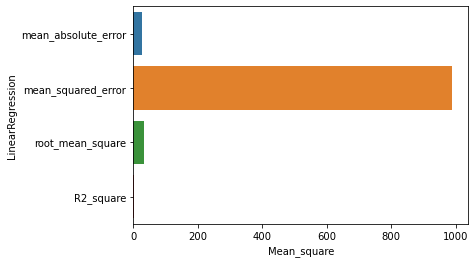

In [169]:
sns.barplot(y = s.LinearRegression, x = s.Mean_square)

In [179]:
## KNNeighbor Regression

from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed,y_train)

y_test_pred = regressor.predict(X_test_transformed)

from sklearn import metrics
b = metrics.mean_absolute_error(y_test,y_test_pred)
b1 = metrics.mean_squared_error(y_test,y_test_pred)
b2 = metrics.mean_squared_error(y_test,y_test_pred, squared = False)
b3  = metrics.r2_score(y_test,y_test_pred)

print(b)
print(b1)
print(b2)
print(b3)


14.189608662991281
338.2576760434302
18.391782840264025
0.7300639564635925


In [180]:
## Support vector Regression

from sklearn.svm import SVR
regressor = SVR()
regressor.fit(X_train_transformed,y_train)

y_test_pred = regressor.predict(X_test_transformed)

from sklearn import metrics
c = metrics.mean_absolute_error(y_test,y_test_pred)
c1 = metrics.mean_squared_error(y_test,y_test_pred)
c2 = metrics.mean_squared_error(y_test,y_test_pred, squared = False)
c3  = metrics.r2_score(y_test,y_test_pred)

print(c)
print(c1)
print(c2)
print(c3)


15.460364867857153
403.8222230220042
20.095328388011087
0.6777422039621627


In [181]:
## DecisionTree Regression

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed,y_train)

y_test_pred = regressor.predict(X_test_transformed)

from sklearn import metrics
d = metrics.mean_absolute_error(y_test,y_test_pred)
d1 = metrics.mean_squared_error(y_test,y_test_pred)
d2 = metrics.mean_squared_error(y_test,y_test_pred, squared = False)
d3  = metrics.r2_score(y_test,y_test_pred)

print(d)
print(d1)
print(d2)
print(d3)


9.456338126973124
331.3994155349224
18.20437902085436
0.7355369784770557


In [183]:
## Random Forest Regression

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed,y_train)

y_test_pred = regressor.predict(X_test_transformed)

from sklearn import metrics
e = metrics.mean_absolute_error(y_test,y_test_pred)
e1 = metrics.mean_squared_error(y_test,y_test_pred)
e2 = metrics.mean_squared_error(y_test,y_test_pred, squared = False)
e3  = metrics.r2_score(y_test,y_test_pred)

print(e)
print(e1)
print(e2)
print(e3)


11.346718906547915
272.18759449606273
16.498108815741965
0.7827891351428615


In [184]:
## Adaboost Regression

from sklearn.ensemble import AdaBoostRegressor
regressor = AdaBoostRegressor()
regressor.fit(X_train_transformed,y_train)

y_test_pred = regressor.predict(X_test_transformed)

from sklearn import metrics
f = metrics.mean_absolute_error(y_test,y_test_pred)
f1 = metrics.mean_squared_error(y_test,y_test_pred)
f2 = metrics.mean_squared_error(y_test,y_test_pred, squared = False)
f3  = metrics.r2_score(y_test,y_test_pred)

print(f)
print(f1)
print(f2)
print(f3)


14.395411089988686
335.3073100648505
18.311398364539244
0.7324184044943298


In [185]:
## GradientBoostRegression

from sklearn.ensemble import GradientBoostingRegressor
regressor =GradientBoostingRegressor()
regressor.fit(X_train_transformed,y_train)

y_test_pred = regressor.predict(X_test_transformed)

from sklearn import metrics
g = metrics.mean_absolute_error(y_test,y_test_pred)
g1 = metrics.mean_squared_error(y_test,y_test_pred)
g2 = metrics.mean_squared_error(y_test,y_test_pred, squared = False)
g3  = metrics.r2_score(y_test,y_test_pred)

print(g)
print(g1)
print(g2)
print(g3)


12.791785551178258
280.50818354757627
16.748378534878423
0.776149147206063


In [186]:
import pandas as pd
Data = {'Algorithms':['LinearRegression','KNN Regression','Support VectorRegression',' Decision TreesRegression','Random Forest Regression',
                           'Adaptive BoostRegression','Gradient Boosting Regression'],'Metrics': [a,b,c,d,e,f,g]}

d = pd.DataFrame(Data)
d

,Algorithms,Metrics
0,LinearRegression,26.577510
1,KNN Regression,14.189609
2,Support VectorRegression,15.460365
3,Decision TreesRegression,9.456338
4,Random Forest Regression,11.346719
5,Adaptive BoostRegression,14.395411
6,Gradient Boosting Regression,12.791786


<AxesSubplot:xlabel='Metrics', ylabel='Algorithms'>

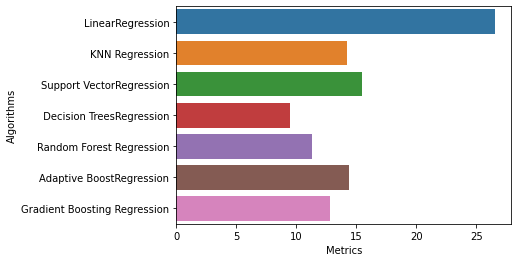

In [187]:
sns.barplot(y = d.Algorithms, x = d.Metrics)

### Conclusion :
- DecissionTree Regression algorithm is the best model for 'Output' prediction
- Compare to other algorithm mean_square_error(y_test, y_test_predict) of DecisionTree Regression is less with 9.456338.
